# Imports

In [ ]:
!pip install nilearn
!pip install nibabel==3.1.1
!pip freeze "expansion_classify.ipynb"
!python --version

import nilearn as nil
import nibabel as nib
from nilearn.image import resample_img
# installing rescale_img does not work in Colab -- works on my machine, so possibly due to Python version (works on 3.7.4, not on 3.6.9)
from nibabel.affines import rescale_img
#git clone from: https://github.com/hiranumn/IntegratedGradients
#run this kernel/directory in the same directory as the cloned code above?

#!pip install Integrated_Gradients 
#from IntegratedGradients import *

     |████████████████████████████████| 2.5MB 5.3MB/s 
     |████████████████████████████████| 3.3MB 5.2MB/s 
  Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2
absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.59
botocore==1.17.59
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.

ImportError: ignored

In [ ]:
# !pip install patchify
# from patchify import patchify, unpatchify

In [ ]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

from keras.callbacks import (
    ReduceLROnPlateau,
    CSVLogger,
    EarlyStopping,
    ModelCheckpoint)

from keras.models import Sequential, Model, load_model
from keras.layers import Dropout, Flatten, Dense, Conv2D, GlobalMaxPooling2D,  MaxPooling2D, BatchNormalization, ZeroPadding2D, AveragePooling2D, Input, Add
from keras.layers import Conv3D, GlobalMaxPooling3D, MaxPooling3D, ZeroPadding3D, AveragePooling3D, add, Activation, MaxPool3D, concatenate, GlobalAveragePooling3D
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical, Sequence
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tarfile
import matplotlib.pyplot as plt

In [ ]:
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Viewer requires Qt
  """


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from gspread.models import Cell
gc = gspread.authorize(GoogleCredentials.get_application_default())
import pandas as pd

In [ ]:
from scipy.ndimage import zoom

# Python Image Display

In [ ]:
def show_slices(slices):
  fig, axes = plt.subplots(1, len(slices))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")

# Loading Data and Labels

In [ ]:
predict_cw = os.listdir("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/cw/images/")
predict_ccw = os.listdir("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/ccw/images/")
spotlight_cw = os.listdir("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/SPOTLIGHT/cw/images/")
spotlight_ccw = os.listdir("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/SPOTLIGHT/ccw/images/")
stopit_cw = os.listdir("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/STOPIT/cw/images/")
stopit_ccw = os.listdir("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/STOPIT/ccw/images/")

In [ ]:
# use gsheets to get a list of all train files
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1p9AY9OeiELlyhE_KZgHhzB9xxQ7VHlhBhE6lehUKXug/edit#gid=1310398912')
all_data = wb.worksheet('Summary')

# grab list of files
train = wb.worksheet("Train Split v2")
train_list = pd.DataFrame(train.get_all_values()).iloc[:,0][318:].tolist()
val = wb.worksheet("Val Split v2")
val_list = pd.DataFrame(val.get_all_values()).iloc[:,0][1:].tolist()
test = wb.worksheet("Test Split v2")
test_list = pd.DataFrame(test.get_all_values()).iloc[:,0][1:].tolist()
total_list = []

# rename to include file path
for i, name in enumerate(train_list):
  total_list.append(name)
  if("PREDICT" in name):
    train_list[i] = name.replace("_", "-")
    train_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/" + train_list[i] + "_0000.nii.gz"
  elif("SPOTLIGHT" in name):
    train_list[i] = name.replace("_", "-")
    train_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/SPOTLIGHT/images/" + train_list[i] + "_0000.nii.gz"
  else:
    train_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/STOPIT/images/" + train_list[i] + ".nii.gz"

for i, name in enumerate(val_list):
  total_list.append(name)
  if("PREDICT" in name):
    val_list[i] = name.replace("_", "-")
    val_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/" + val_list[i] + "_0000.nii.gz"
  elif("SPOTLIGHT" in name):
    val_list[i] = name.replace("_", "-")
    val_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/SPOTLIGHT/images/" + val_list[i] + "_0000.nii.gz"
  else:
    val_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/STOPIT/images/" + val_list[i] + ".nii.gz"

for i, name in enumerate(test_list):
  total_list.append(name)
  if("PREDICT" in name):
    test_list[i] = name.replace("_", "-")
    test_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/" + test_list[i] + "_0000.nii.gz"
  elif("SPOTLIGHT" in name):
    test_list[i] = name.replace("_", "-")
    test_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/SPOTLIGHT/images/" + test_list[i] + "_0000.nii.gz"
  else:
    test_list[i] = "/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/STOPIT/images/" + test_list[i] + ".nii.gz"

# add all cw, ccw paths and files
cnt = 0
cwccw = np.empty([634,2], dtype=object)

for i in predict_cw:
  train_list.append(os.path.join("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/cw/images/", i))
  cwccw[cnt][0] = i
  cnt = cnt + 1

for i in spotlight_cw:
  train_list.append(os.path.join("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/SPOTLIGHT/cw/images/", i))
  cwccw[cnt][0] = i
  cnt = cnt + 1

for i in stopit_cw:
  train_list.append(os.path.join("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/STOPIT/cw/images/", i))
  cwccw[cnt][0] = i
  cnt = cnt + 1

for i in predict_ccw:
  train_list.append(os.path.join("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/ccw/images/", i))
  cwccw[cnt][0] = i
  cnt = cnt + 1

for i in spotlight_ccw:
  train_list.append(os.path.join("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/SPOTLIGHT/ccw/images/", i))
  cwccw[cnt][0] = i
  cnt = cnt + 1

for i in stopit_ccw:
  train_list.append(os.path.join("/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/STOPIT/ccw/images/", i))
  cwccw[cnt][0] = i
  cnt = cnt + 1

# check
print("Length of count: " + str(cnt))
print("Length of Train: " + str(len(train_list)))
print("Length of Val: " + str(len(val_list)))
print("Length of Test: " + str(len(test_list)))

for i in train_list:
  print(i)

Length of count: 634
Length of Train: 667
Length of Val: 142
Length of Test: 142
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-01-027_0000.nii.gz
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-01-069_0000.nii.gz
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-04-021_0000.nii.gz
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-05-020_0000.nii.gz
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-01-047_0000.nii.gz
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-05-035_0000.nii.gz
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-04-027_0000.nii.gz
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-09-041_0000.nii.gz
/conten

In [ ]:
# # load in images using nibabel
# img_train = []
# img_val = []
# img_test = []

# for i in train_list:
#   img = nib.load(i)
#   img_train.append(img)

# for i in val_list:
#   img = nib.load(i)
#   img_val.append(img)

# for i in test_list:
#   img = nib.load(i)
#   img_test.append(img)

img_train, img_val, img_test -> our loaded nifti images

(512, 512, 32)
(512, 512, 35)
(512, 512, 33)
(512, 512, 31)


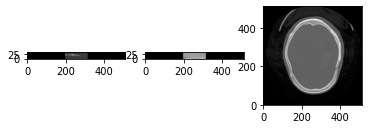

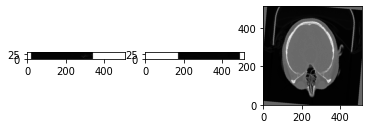

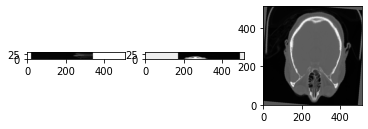

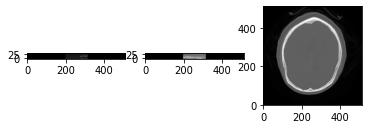

In [ ]:
# # check
# for img in img_val[138:142]:
#   img_data = img.get_fdata()
#   np.clip(img_data, -1024, 3071, out=img_data)
#   slice_0 = img_data[6, :, :]
#   slice_1 = img_data[:, 6, :]
#   slice_2 = img_data[:, :, 12]
#   show_slices([slice_0, slice_1, slice_2])
#   print(img.shape)

In [ ]:
# use gsheets to get a list of all train, val, test files and labels
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1p9AY9OeiELlyhE_KZgHhzB9xxQ7VHlhBhE6lehUKXug/edit#gid=1310398912')
all_data = wb.worksheet('Summary')

labels_train = pd.DataFrame(pd.DataFrame(train.get_all_values()).iloc[:,5][318:])
labels_train.insert(0, "Name", pd.DataFrame(train.get_all_values()).iloc[:,0][318:])
train_name_label = labels_train.values.tolist()
labels_train = labels_train.iloc[:,1].values.tolist()

labels_val = pd.DataFrame(pd.DataFrame(val.get_all_values()).iloc[1:,5])
labels_val.insert(0, "Name", pd.DataFrame(val.get_all_values()).iloc[1:,0])
val_name_label = labels_val.values.tolist()
labels_val = labels_val.iloc[:,1].values.tolist()

labels_test = pd.DataFrame(pd.DataFrame(test.get_all_values()).iloc[1:,5])
labels_test.insert(0, "Name", pd.DataFrame(test.get_all_values()).iloc[1:,0])
test_name_label = labels_test.values.tolist()
labels_test = labels_test.iloc[:,1].values.tolist()

#create a list with all files
total_list = []

for i in train_name_label:
  total_list.append(i)

for i in val_name_label:
  total_list.append(i)

for i in test_name_label:
  total_list.append(i)

#generate labels for cw/ccw
for i, value in enumerate(cwccw):
  for j in total_list:
    if j[0].replace('_', '-') in value[0]:
      cwccw[i][1] = j[1]

for i in cwccw:
  labels_train.append(i[1])

In [ ]:
# check
for i, value in enumerate(labels_train):
  print(train_list[i] + "   " + value)

/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-01-027_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-01-069_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-04-021_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-05-020_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-01-047_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-05-035_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-04-027_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final Images/dataset/PREDICT/images/PREDICT-09-041_0000.nii.gz   1
/content/drive/My Drive/Hematoma Expansion Cohorts/Final

labels_train, labels_val, labels_test -> our loaded labels (expanders vs. non-expanders)

# Data Preprocessing

Patch based Generation

In [ ]:
patch_train = []
patch_val = []
patch_test = []

def patch(img):
  print("Image shape:  " + str(img.shape))
  img_data = img.get_fdata()
  patch = patchify(img_data, (512, 512, img_data.shape[2]), step = 1)
  print("Patch shape:  " + str(patch.shape))
  return patch

Shape Normalization

In [ ]:
def img_resample(img, files, affine, shape):
  return resample_img(img, target_affine=affine, target_shape=shape)

In [ ]:
def largest(files):
  #get depth dimension of first file
  large = files[0].shape[2]
  #loop through files and find largest dimension of all files
  for i, img in enumerate(files):
    if img.shape[2] > large:
      large = img.shape[2]
      image = img
  print("Shape: " + str(large))
  return large

In [ ]:
def shape_norm(img, files):
  img_data = img.get_fdata()
  num = largest(files)
  shape = img.shape[2]
  print("Scaling factor: " + str(num/shape))
  print("Original shape: " + str(img_data.shape))
  print("Original affine: " + str(img.affine))
  scaled_img_data = zoom(img_data, (1, 1, num/shape))
  print("Done! New shape: " + str(scaled_img_data.shape))
  scaled_img = nib.Nifti1Image(scaled_img_data, img.affine, img.header)
  print("New affine: " + str(scaled_img.affine))
  return scaled_img

In [ ]:
# getter code chunk to check above shape norm
check_intensity(img_train[0], img_train[0].shape[2]-1)
img = shape_norm(img_train[0], img_train)

#image affine rescaling unable to work, can't be imported
#img = img_resample(img_train[0], img_train, img_train[0].affine, (512, 512, 393))
check_intensity(img, img.shape[2]-1)

NameError: ignored

Intensity Clipping

In [ ]:
def intensity_clip(img):
  img_data = img.get_fdata()
  np.clip(img_data, -1024, 3071, out=img_data)
  return nib.Nifti1Image(img_data, img.affine, img.header)

def check_intensity(img, slice):
  img_data = img.get_fdata()
  slice_0 = img_data[6, :, :]
  slice_1 = img_data[:, 6, :]
  slice_2 = img_data[:, :, slice]
  show_slices([slice_0, slice_1, slice_2])

Min-max Feature Normalization

In [ ]:
def feature_scale(img, a, b):
  img_data = img.get_fdata()

  flattened = np.ravel(img_data)
  plt.subplot(1,2,1)
  plt.hist(flattened)
  plt.title("Original")

  x_min = min(flattened)
  x_max = max(flattened)
  print("Min: " + str(x_min))
  print("Max: " + str(x_max))
  #normalized array based on eqn in: https://en.wikipedia.org/wiki/Normalization_(statistics)
  norm_data = np.add(a, np.divide(np.multiply(np.add(img_data, -1*x_min), b-a), x_max-x_min))

  plt.subplot(1,2,2)
  plt.hist(np.ravel(norm_data))
  plt.title("Normalized")

  #norm_data = a + (img_data-x_min)(b-a)/(x_max-x_min)
  return nib.Nifti1Image(norm_data, img.affine, img.header)

Min: -1024.0
Max: 1859.0


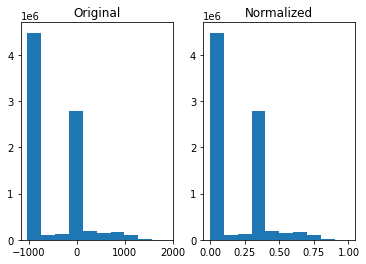

In [ ]:
#test function
img = feature_scale(img_train[0], 0, 1)

Preprocessing Getter Function

In [ ]:
def preprocess(img, files, a, b):
  processed_img = feature_scale(intensity_clip(shape_norm(img, files)), 0, 1)
  check_intensity(processed_img, processed_img.shape[2]-1)

Shape: 393
Scaling factor: 12.67741935483871
Original shape: (512, 512, 31)
Original affine: [[-4.68749996e-01 -6.37477386e-05 -6.54742244e-05  1.19765625e+02]
 [ 6.37477386e-05 -4.60137739e-01 -9.54044891e-01  3.10345184e+02]
 [ 6.13820854e-06 -8.94417085e-02  4.90813593e+00 -1.40479645e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Done! New shape: (512, 512, 393)
New affine: [[-4.68749996e-01 -6.37477386e-05 -6.54742244e-05  1.19765625e+02]
 [ 6.37477386e-05 -4.60137739e-01 -9.54044891e-01  3.10345184e+02]
 [ 6.13820854e-06 -8.94417085e-02  4.90813593e+00 -1.40479645e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Min: -1024.0
Max: 2190.994998689492


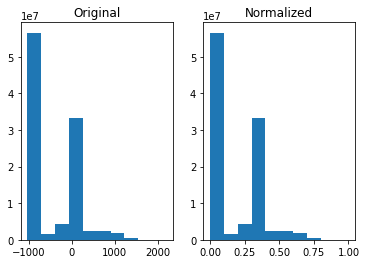

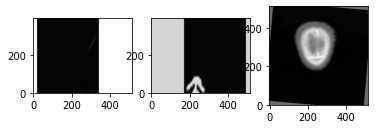

In [ ]:
#check
preprocess(img_train[0], img_train, 0, 1)

#3D Resnet-50

In [ ]:
def Conv3d_BN(x, nb_filter, kernel_size, strides=1, padding='same', name=None):
  """
  identity_block: function for 3d convolutional layer and batch normalization
    x: input from previous layer, 3D array of values
    nb_filter: number of convolutional kernels to use to determine dimensionality of th output, int
    kernel_size: dimensions of kernel size, 3D array dimensions
    strides: stride length, int
    padding: determines added values in boundaries of matrix (padding), string

  return: convolutional layer with batch normalization
  """
  x = Conv3D(nb_filter, kernel_size, padding=padding, data_format='channels_first', strides=strides, activation='relu')(x)
  x = BatchNormalization()(x)
  return x

In [ ]:
#implementation sourced from: https://github.com/pantheon5100/3D-CNN-resnet-keras/blob/master/Cre_Model.py
def identity_Block(inpt, nb_filter, kernel_size, strides=1, with_conv_shortcut=False):
  """
  identity_Block: identity block for skip layer
    inpt: input from previous layer, 3d tuples
    nb_filter: number of convolutional kernels to use to determine dimensionality of th output, int
    kernel_size: dimensions of kernel size, 3D array dimensions
    strides: stride length, int
    with_conv_shortcut: determines whether there shortcut is to be used (adds another conv + bn layer), bool
  
  return: keras layers object
  """
  x = Conv3d_BN(inpt, nb_filter=nb_filter, kernel_size=kernel_size, strides=strides, padding='same')
  x = Conv3d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size, padding='same')
  if with_conv_shortcut:
    shortcut = Conv3d_BN(inpt, nb_filter=nb_filter, strides=strides,
                         kernel_size=kernel_size)
    x = Dropout(0.2)(x)
    x = add([x, shortcut])
    return x
  else:
    x = add([x, inpt])
    return x

In [ ]:
def resnet_3d(shape, classes):
  """
  resnet: Implementation for the 3D residual network
    shape: the input shape of the original images, 3d dimension shape
    classes: the amount of output classes, int

  return: model object
  """
  inpt = Input(shape=shape)
  x = ZeroPadding3D((1, 1, 1), data_format='channels_first')(inpt)

  # conv1
  x = Conv3d_BN(x, nb_filter=16, kernel_size=(6, 6, 6), strides=1, padding='valid')
  x = MaxPooling3D(pool_size=(3, 3, 3), strides=2, data_format='channels_first')(x)

  # conv2_x
  x = identity_Block(x, nb_filter=32, kernel_size=(2, 2, 2), strides=1, with_conv_shortcut=True)
  x = identity_Block(x, nb_filter=32, kernel_size=(2, 2, 2))
# x = identity_Block(x, nb_filter=64, kernel_size=(3, 3, 3))

  # conv3_x
  x = identity_Block(x, nb_filter=64, kernel_size=(2, 2, 2), strides=1, with_conv_shortcut=True)
  x = identity_Block(x, nb_filter=64, kernel_size=(2, 2, 2))
# x = identity_Block(x, nb_filter=128, kernel_size=(3, 3, 3))
# x = identity_Block(x, nb_filter=128, kernel_size=(3, 3, 3))

  # conv4_x
# x = identity_Block(x, nb_filter=256, kernel_size=(3, 3, 3), strides=2, with_conv_shortcut=True)
# x = identity_Block(x, nb_filter=256, kernel_size=(3, 3, 3))
# x = identity_Block(x, nb_filter=256, kernel_size=(3, 3, 3))

  x = AveragePooling3D(pool_size=(2, 2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Flatten()(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(classes, activation='sigmoid')(x)

  model = Model(inputs=inpt, outputs=x)
  return model

In [ ]:
model = resnet_3d((1, 512, 512, 50), 2)
model.summary()

epochs=1000
learningRate=0.01
decay=learningRate/epochs
sgd = SGD(lr=learningRate, decay=decay, momentum=0.9, nesterov=False)
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

# 3D VGG-16

https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3

In [ ]:
def vgg_16(shape, classes):
  """
  vgg_16: keras implementation of vgg_16 net, 3D
    shape: input shape of the first image, tuple
    classes: number of output classes, int

  return: model object
  """
  model = Sequential()

  #interesting, there's no batch normalization  
  model.add(ZeroPadding3D((1, 1, 1), input_shape=shape))
  model.add(Conv3D(64, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(64, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(128, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(128, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(256, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(256, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(256, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(512, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(512, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(512, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))

  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(512, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(512, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(ZeroPadding3D((1, 1, 1)))
  model.add(Conv3D(512, (3, 3, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization)
  model.add(MaxPooling3D(pool_size=(2, 2), strides=(2, 2)))

  model.add(Flatten())
  model.add(Dense(4096))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(classes))
  model.add(Activation('sigmoid'))
  
  return model

In [ ]:
sgd = SGD(lr=0.1, decay=1e-6, nesterov=True)
vgg_16(shape=(512,512,393,1), classes=2).compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

TypeError: ignored

# 3D GoogLeNet

https://gist.github.com/joelouismarino/a2ede9ab3928f999575423b9887abd14
https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
def inception(x, filters_1x1x1, filters_3x3x3_reduce, filters_3x3x3, filters_5x5x5_reduce, filters_5x5x5, filters_pool_proj, name=None):
  """
  inception: implementation of 3D inception module for later use in GoogLENet
    x: input from previous neural network layer, object
    filters_1x1x1: number of convolutional filter with size 1x1x1, int
    filters_3x3x3_reduce: number of convolutional filters with size 3x3x3 for reduction of size, int
    filters_3x3x3: number of convolutional filters with size 3x3x3, int
    filters_5x5x5_reduce: number of convolutional filters with size 5x5x5 for reduction of dimensionailty, int
    filters_5x5x5: number of convolutional filters with size 5x5x5

  returns: inception layer of neural network (object)
  """
  conv_1x1x1 = Conv3D(filters_1x1x1, (1, 1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)

  conv_3x3x3 = Conv3D(filters_3x3x3_reduce, (1, 1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
  conv_3x3x3 = Conv3D(filters_3x3x3, (3, 3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3x3)

  conv_5x5x5 = Conv3D(filters_5x5x5_reduce, (1, 1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
  conv_5x5x5 = Conv3D(filters_5x5x5, (5, 5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5x5)

  pool_proj = MaxPool3D((3, 3, 3), strides=(1, 1, 1), padding='same')(x)
  pool_proj = Conv3D(filters_pool_proj, (1, 1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

  output = concatenate([conv_1x1x1, conv_3x3x3, conv_5x5x5, pool_proj], axis=4, name=name)

  return output

In [ ]:
def googLe_net(shape, classes):
  """
  googLe_net: keras implementation of the 3D GoogLeNet
    shape: input shape of the initial image, 3d array
    classes: number of classes for classification, int

  return: model object
  """
  #input layer
  input_layer = Input(shape)

  #first convolutional layer
  x = Conv3D(64, (7, 7, 7), padding='same', strides=(2, 2, 2), activation='relu', name='conv_1_7x7/2')(input_layer)
  x = MaxPool3D((3, 3, 3), padding='same', strides=(2, 2, 2), name='max_pool_1_3x3/2')(x)

  x = Conv3D(64, (1, 1, 1), padding='same', strides=(1, 1, 1), activation='relu', name='conv_2a_3x3/1')(x)
  x = Conv3D(192, (3, 3, 3), padding='same', strides=(1, 1, 1), activation='relu', name='conv_2b_3x3/1')(x)
  x = MaxPool3D((3, 3, 3), padding='same', strides=(2, 2, 2), name='max_pool_2_3x3/2')(x)

  #first inception layers
  x = inception(x,
                filters_1x1x1=64,
                filters_3x3x3_reduce=96,
                filters_3x3x3=128,
                filters_5x5x5_reduce=16,
                filters_5x5x5=32,
                filters_pool_proj=32,
                name='inception_3a')

  x = inception(x,
                filters_1x1x1=128,
                filters_3x3x3_reduce=128,
                filters_3x3x3=192,
                filters_5x5x5_reduce=32,
                filters_5x5x5=96,
                filters_pool_proj=64,
                name='inception_3b')

  #pooling layer
  x = MaxPool3D((3, 3, 3), padding='same', strides=(2, 2, 2), name='max_pool_3_3x3/2')(x)

  #second inception layer
  x = inception(x,
                filters_1x1x1=192,
                filters_3x3x3_reduce=96,
                filters_3x3x3=208,
                filters_5x5x5_reduce=16,
                filters_5x5x5=48,
                filters_pool_proj=64,
                name='inception_4a')

  #x1, fully connected branch after second inception layer
  x1 = AveragePooling3D((5, 5, 5), strides=3)(x)
  x1 = Conv3D(128, (1, 1, 1), padding='same', activation='relu')(x1)
  x1 = Flatten()(x1)
  x1 = Dense(1024, activation='relu')(x1)
  x1 = Dropout(0.7)(x1)
  x1 = Dense(classes, activation='softmax', name='auxilliary_output_1')(x1)

  #third inception layer
  x = inception(x,
                filters_1x1x1=160,
                filters_3x3x3_reduce=112,
                filters_3x3x3=224,
                filters_5x5x5_reduce=24,
                filters_5x5x5=64,
                filters_pool_proj=64,
                name='inception_4b')

  x = inception(x,
                filters_1x1x1=128,
                filters_3x3x3_reduce=128,
                filters_3x3x3=256,
                filters_5x5x5_reduce=24,
                filters_5x5x5=64,
                filters_pool_proj=64,
                name='inception_4c')

  x = inception(x,
                filters_1x1x1=112,
                filters_3x3x3_reduce=144,
                filters_3x3x3=288,
                filters_5x5x5_reduce=32,
                filters_5x5x5=64,
                filters_pool_proj=64,
                name='inception_4d')

  #x2, fully connected branch after third inception layer
  x2 = AveragePooling3D((5, 5, 5), strides=3)(x)
  x2 = Conv3D(128, (1, 1, 1), padding='same', activation='relu')(x2)
  x2 = Flatten()(x2)
  x2 = Dense(1024, activation='relu')(x2)
  x2 = Dropout(0.7)(x2)
  x2 = Dense(classes, activation='softmax', name='auxilliary_output_2')(x2)

  #fourth inception layer
  x = inception(x,
                filters_1x1x1=256,
                filters_3x3x3_reduce=160,
                filters_3x3x3=320,
                filters_5x5x5_reduce=32,
                filters_5x5x5=128,
                filters_pool_proj=128,
                name='inception_4e')

  #pooling layer
  x = MaxPool3D((3, 3, 3), padding='same', strides=(2, 2, 2), name='max_pool_4_3x3/2')(x)

  #fifth inception layer
  x = inception(x,
                filters_1x1x1=256,
                filters_3x3x3_reduce=160,
                filters_3x3x3=320,
                filters_5x5x5_reduce=32,
                filters_5x5x5=128,
                filters_pool_proj=128,
                name='inception_5a')

  x = inception(x,
                filters_1x1x1=384,
                filters_3x3x3_reduce=192,
                filters_3x3x3=384,
                filters_5x5x5_reduce=48,
                filters_5x5x5=128,
                filters_pool_proj=128,
                name='inception_5b')

  #pooling layer, final fully connected output layer
  x = GlobalAveragePooling3D(name='avg_pool_5_3x3/1')(x)
  x = Dropout(0.4)(x)
  x = Dense(classes, activation='softmax', name='output')(x)

  model = Model(input_layer, [x, x1, x2], name='inception_v1')
  model.summary()

  return model

In [ ]:
sgd = SGD(lr=0.1, momentum=0.9, nesterov=False)
googLe_net((512, 512, 393, 1), 2).compile(loss=['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 512, 512, 39 0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv3D)           (None, 256, 256, 197 22016       input_16[0][0]                   
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling3D) (None, 128, 128, 99, 0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv3D)          (None, 128, 128, 99, 4160        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

# Fit Generator

In [ ]:
class My_Generator(Sequence):

  def __init__(self, image_filenames, labels, batch_size):
    print(len(image_filenames))
    print(len(labels))
    self.image_filenames = image_filenames 
    self.labels = labels
    self.batch_size = batch_size

  def __len__(self):
    return int(np.ceil(len(self.image_filenames) / float(self.batch_size)))

  def __getitem__(self, idx):
    batch_x = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

    x=np.zeros((len(batch_x),input_resolution,input_resolution,input_resolution,1), dtype=np.int16)
    y=np.zeros((len(batch_x),input_resolution,input_resolution,input_resolution,1), dtype=np.int16)
    
    #x[:,:,:,:,0] = np.array([preprocess(nib.load(file_name)).get_data() for file_name in batch_x])
    x[:,:,:,:,0] = np.array([nib.load(file_name).get_data() for file_name in batch_x])
    y = np.array([label for label in batch_y])

    print(x.shape)
    print(y.shape)

    return x,y 

In [ ]:
## instantiate model generators for each subset of dataset (training, validation and testing)
batch_size = 1

my_training_batch_generator = My_Generator(train_list[:20], labels_train[:20], batch_size)
my_validation_batch_generator = My_Generator(val_list, labels_val, batch_size)
my_test_batch_generator = My_Generator(test_list, labels_val, batch_size)

num_epochs = 5

history = resnet_3d((1, 512, 512, 393), 2).fit_generator(generator=my_training_batch_generator, 
                    steps_per_epoch=(num_training_samples // batch_size),
                    epochs=num_epochs,
                    verbose=1,
                    validation_data=my_validation_batch_generator,
                    validation_steps=(num_validation_samples // batch_size),
                    use_multiprocessing=False,
                    max_queue_size=batch_size)

20
20
142
142
142
142


NameError: ignored

# Archived Code

## AlexNet 3D

In [ ]:
def alexnet_3d(input_shape, classes):
  """
  alexnet_3d: keras implementation of the 3d alexnet
    input_shape: shape of the first image shape, tuple
    classes: number of output classes, int

  return: model object
  """
  #AlexNet 3D implementation
  model = keras.Sequential()
  model.add(keras.Input(shape=input_shape))  #512x512x393x1 shape normalization

  #1st Convolutional Layer
  model.add(Conv3D(96, 11, strides=4, activation="relu", padding='valid'))
  #Batch norm 
  model.add(BatchNormalization())
  #Max Pooling
  model.add(MaxPooling3D(2,2,padding='valid'))

  #2nd Convolutional Layer 
  model.add(Conv3D(256, 11, strides=1, activation="relu", padding="valid"))
  #Batch norm for output of FC
  model.add(BatchNormalization())
  #Max Pooling
  model.add(MaxPooling3D(2,2,padding='valid'))

  #3rd Convolutional Layer
  model.add(Conv3D(384, 3, strides=1, activation="relu", padding='valid'))
  #Batch norm for output of FC
  model.add(BatchNormalization())
  #model.add(MaxPooling2D(2))

  #4th Convolutional Layer
  model.add(Conv3D(384, 3, strides=1, activation="relu", padding='valid'))
  #Batch norm for output of FC
  model.add(BatchNormalization())

  #5th Convolutional Layer
  model.add(Conv3D(256, 3, strides=1, activation="relu", padding='valid'))
  #Batch norm for output of FC
  model.add(BatchNormalization())
  #Max Pooling
  mode.add(MaxPooling3D(2,2,padding='valid'))

  #Pass to FC layer
  model.add(Flatten())

  #1st FC layer
  model.add(Dense(4096, input_shape=(509*509*3,), activation='relu')) #check for correct input shape
  #Add Dropout to prevent overfitting
  model.add(Dropout(0.4))

  #2nd FC layer
  model.add(Dense(4096, activation='relu'))
  #Add Dropout
  model.add(Dropout(0.4))

  #3rd FC layer
  model.add(Dense(1000, activation='relu'))
  #Add dropout
  model.add(Dropout(0.4))

  #Output layer
  model.add(Dense(classes, activation='sigmoid'))

  #Summary
  model.summary()
  return model

In [ ]:
#potential stochastic gradient descent optimizer for adjusting lr, momentum
opt=SGD(lr=0.01, momentum=0.9)
alexnet_3d((512, 512, 393, 1), 2).compile(optimizer="adam", loss="binary_crossentropy")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 126, 126, 96, 96)  127872    
_________________________________________________________________
batch_normalization_5 (Batch (None, 126, 126, 96, 96)  384       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 63, 48, 96)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 53, 53, 38, 256)   32710912  
_________________________________________________________________
batch_normalization_6 (Batch (None, 53, 53, 38, 256)   1024      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 26, 26, 19, 256)   0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 24, 24, 17, 384)  

## AlexNet 2D

In [ ]:
def alexnet_2d(input_shape, classes):
  """
  alexnet_2d: keras implementation of 2d alexnet
    input_shape: shape of the input image, tuple
    classes: number of output classes, int

  return: model object
  """
  #AlexNet 2D implementation
  model = keras.Sequential()
  model.add(keras.Input(shape=input_shape))  #512x512x393 shape normalization
  
  #1st Convolutional Layer
  model.add(Conv2D(96, 11, strides=4, activation="relu", padding='valid'))
  #Batch norm 
  model.add(BatchNormalization())
  #Max Pooling
  model.add(MaxPooling2D(2,2,padding='valid'))

  #2nd Convolutional Layer 
  model.add(Conv2D(256, 11, strides=1, activation="relu", padding="valid"))
  #Batch norm for output of FC
  model.add(BatchNormalization())
  #Max Pooling
  model.add(MaxPooling2D(2,2,padding='valid'))

  #3rd Convolutional Layer
  model.add(Conv2D(384, 3, strides=1, activation="relu", padding='valid'))
  #Batch norm for output of FC
  model.add(BatchNormalization())
  #model.add(MaxPooling2D(2))

  #4th Convolutional Layer
  model.add(Conv2D(384, 3, strides=1, activation="relu", padding='valid'))
  #Batch norm for output of FC
  model.add(BatchNormalization())

  #5th Convolutional Layer
  model.add(Conv2D(256, 3, strides=1, activation="relu", padding='valid'))
  #Batch norm for output of FC
  model.add(BatchNormalization())
  #Max Pooling
  model.add(MaxPooling2D(2,2,padding='valid'))
  
  #Pass to FC layer
  model.add(Flatten())

  #1st FC layer
  model.add(Dense(4096, input_shape=(224*224*3,), activation='relu'))  #check for correct input shape
  #Add Dropout to prevent overfitting
  model.add(Dropout(0.4))

  #2nd FC layer
  model.add(Dense(4096, activation='relu'))
  #Add Dropout
  model.add(Dropout(0.4))

  #3rd FC layer
  model.add(Dense(1000, activation='relu'))
  #Add dropout
  model.add(Dropout(0.4))

  #Output layer
  model.add(Dense(classes, activation='sigmoid'))

  #Summary
  model.summary()

  return model

In [ ]:
#potential stochastic gradient descent optimizer for adjusting lr, momentum
opt=SGD(lr=0.01, momentum=0.9)
alexnet_2d((512, 512, 10), True).compile(optimizer=opt, loss="binary_crossentropy")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 96)      116256    
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 96)      384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 256)       2973952   
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 384)       8

In [ ]:
#using github repository from github.com/JihongJu/keras-resnet3d
model = Resnet3DBuilder.build_resnet_50((512, 512, 393, 1), 2)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model.fit(X_train, y_train, batch_size=32)

10
16
New shape: (512, 512, 10)
15
New shape: (512, 512, 10)
10
New shape: (512, 512, 10)
11
New shape: (512, 512, 10)
15
New shape: (512, 512, 10)


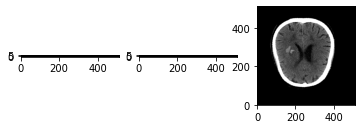

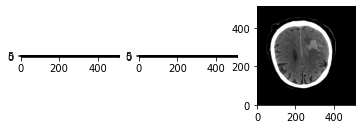

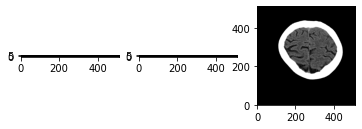

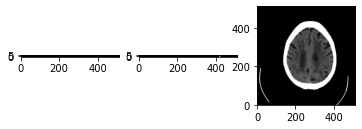

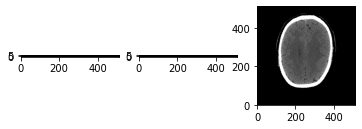

In [ ]:
# for previous shape normalization to smallest shape
small = img_train[0].shape[2]

for i, img in enumerate(img_train):
  if img.shape[2] < small:
    small = img.shape[2]
    image = img

print(small)

temp = []

for i, img in enumerate(img_train[0:5]):
  num = int(np.ceil(img.shape[2]/2))
  print(num)
  img_data = img.get_fdata()
  norm_img = img_data[:, :, (num-int(np.floor(small/2))):(num+int(np.ceil(small/2)))]

  print("New shape: " + str(norm_img.shape))

  temp.append(norm_img)

  np.clip(norm_img, 0, 100, out=norm_img)
  slice_0 = norm_img[6, :, :]
  slice_1 = norm_img[:, 6, :]
  slice_2 = norm_img[:, :, 9]
  show_slices([slice_0, slice_1, slice_2])

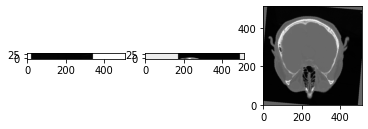

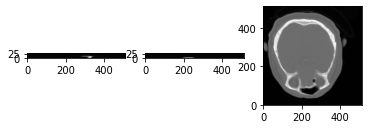

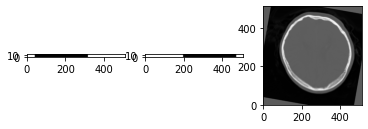

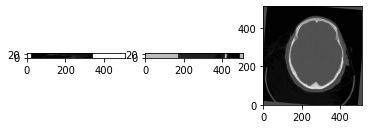

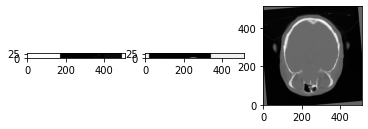

In [ ]:
#previous code for intensity clipping
for i, img in enumerate(img_train[6:10]):
  img_data = img.get_fdata()
  header = img.header
  #slope = img_data.scl_slope
  #intercept = img_data.scl_inter
  #print(header)
  #np.clip(img, -1024, 3071, out=img)

#according to the header, there is no way to adjust the pixel values to be Hounsfield values (there is no scl_slope or scl_inter on our images)
#maybe it would be better to get his info from the original DICOMs?
for i, img in enumerate(img_train[0:5]):
  img_data = img.get_fdata()
  np.clip(img_data, -1024, 3071, out=img_data)
  slice_0 = img_data[6, :, :]
  slice_1 = img_data[:, 6, :]
  slice_2 = img_data[:, :, 9]
  show_slices([slice_0, slice_1, slice_2])

# for i, img in enumerate(img_val):
#   img_data = img.get_fdata()
#   np.clip(img_data, 0, 100, out=img_data)
#   # slice_0 = img_data[6, :, :]
#   # slice_1 = img_data[:, 6, :]
#   # slice_2 = img_data[:, :, 9]
#   # show_slices([slice_0, slice_1, slice_2])

# for i, img in enumerate(img_test):
#   img_data = img.get_fdata()
#   np.clip(img_data, 0, 100, out=img_data)
#   # slice_0 = img_data[6, :, :]
#   # slice_1 = img_data[:, 6, :]
#   # slice_2 = img_data[:, :, 9]
#   # show_slices([slice_0, slice_1, slice_2])